<a href="https://colab.research.google.com/github/SHREEMATHI-S/CUSTOMER-BEHAVIOUR/blob/main/Analyze_customer_behavior_based_on_transaction_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploads1 = files.upload()

Saving Hackathon_Ideal_Data.csv to Hackathon_Ideal_Data.csv


In [25]:
import pandas as pd
import io

# Load each file into a pandas DataFrame using the uploaded content
Ideal_data = pd.read_csv(io.BytesIO(uploads1['Hackathon_Ideal_Data.csv']))

# Now you can call head() on the DataFrame
print("\nIdeal Data:")
print(Ideal_data.head())


Ideal Data:
  MONTH STORECODE  QTY  VALUE                GRP               SGRP  \
0    M1        P1   25     83  HAIR CONDITIONERS  HAIR CONDITIONERS   
1    M1        P1    6     22  HAIR CONDITIONERS  HAIR CONDITIONERS   
2    M1        P1    4     15  HAIR CONDITIONERS  HAIR CONDITIONERS   
3    M1        P1   15     60  HAIR CONDITIONERS  HAIR CONDITIONERS   
4    M1        P2    0      0  HAIR CONDITIONERS  HAIR CONDITIONERS   

               SSGRP                         CMP         MBRD  \
0  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
1  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
2  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
3  HAIR CONDITIONERS               L'OREAL INDIA      GARNIER   
4  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED  CLINIC PLUS   

                     BRD  
0  DOVE HAIR FALL RESCUE  
1    DOVE INTENSE REPAIR  
2   DOVE OXYGEN MOISTURE  
3                FRUCTIS  
4            CLINIC PLUS  


In [5]:
uploads2 = files.upload()

Saving Hackathon_Mapping_File.csv to Hackathon_Mapping_File.csv


In [23]:
import pandas as pd
import io

# Load each file into a pandas DataFrame using the uploaded content
mapping_data = pd.read_csv(io.BytesIO(uploads2['Hackathon_Mapping_File.csv']))

# Now you can call head() on the DataFrame
print("\nMapping Data:")
print(mapping_data.head())



Mapping Data:
              File Name Column Name           Column Description
0  Hackathon_Ideal_Data       MONTH        Month ID (M1, M2, M3)
1                   NaN   STORECODE  STORE CODE (P1, P2, …, P10)
2                   NaN         QTY                   Sales Unit
3                   NaN       VALUE                  Sales Value
4                   NaN         GRP                     Category


In [6]:
uploads3 = files.upload()

Saving Hackathon_Validation_Data.csv to Hackathon_Validation_Data.csv


In [30]:
import pandas as pd
import io

# Load each file into a pandas DataFrame using the uploaded content
Validation_data = pd.read_csv(io.BytesIO(uploads3['Hackathon_Validation_Data.csv']))

# Now you can call head() on the DataFrame
print("\n Validation Data:")
print(Validation_data.head())


 Validation Data:
        ID STORECODE MONTH                       GRP
0  1112535        N1    M1       AFTER SHAVE LOTIONS
1  1112539        N1    M1    AGARBATTI & DHOOPBATTI
2  1112543        N1    M1  ALL AIR FRESHNERS(01/03)
3  1112547        N1    M1          ALL IODISED SALT
4  1112551        N1    M1                  ANTACIDS


In [7]:
uploads4 = files.upload()

Saving Hackathon_Working_Data.csv to Hackathon_Working_Data.csv


In [32]:
import pandas as pd
import io

# Load each file into a pandas DataFrame using the uploaded content
Working_data = pd.read_csv(io.BytesIO(uploads4['Hackathon_Working_Data.csv']))

# Now you can call head() on the DataFrame
print("\n Working Data:")
print(Working_data.head())


 Working Data:
  MONTH STORECODE  DAY BILL_ID  BILL_AMT  QTY  VALUE  PRICE  \
0    M1        N1    4    T375     225.0  1.0  225.0  225.0   
1    M1        N1    4    T379      95.0  1.0   95.0   95.0   
2    M1        N1    4    T381      10.0  1.0   10.0   10.0   
3    M1        N1    4    T382     108.0  1.0  108.0  108.0   
4    M1        N1    4    T384      19.0  1.0   19.0   19.0   

                       GRP                     SGRP                    SSGRP  \
0     BUTTER MARGR  (4/94)                   BUTTER                   SALTED   
1  CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS   
2                CHOCOLATE         CHOCOLATE PANNED         CHOCOLATE PANNED   
3             PACKAGED TEA               MAIN PACKS               MAIN PACKS   
4         ALL IODISED SALT            POWDERED SALT            POWDERED SALT   

                      CMP           MBRD                 BRD  
0               G C M M F           AMUL                AMUL 

In [10]:
print(type(uploads1))  # Check the type of uploads1


<class 'dict'>


In [11]:
print(uploads1.keys())  # This will show the keys in the dictionary


dict_keys(['Hackathon_Ideal_Data.csv'])


In [34]:
print("\n IDEAL DATA")
print(Ideal_data.head())
print("\n MAPPING DATA")
print(mapping_data.head())
print("\n VALIDATION DATA")
print(Validation_data.head())
print("\n WORKING DATA")
print(Working_data.head())


 IDEAL DATA
  MONTH STORECODE  QTY  VALUE                GRP               SGRP  \
0    M1        P1   25     83  HAIR CONDITIONERS  HAIR CONDITIONERS   
1    M1        P1    6     22  HAIR CONDITIONERS  HAIR CONDITIONERS   
2    M1        P1    4     15  HAIR CONDITIONERS  HAIR CONDITIONERS   
3    M1        P1   15     60  HAIR CONDITIONERS  HAIR CONDITIONERS   
4    M1        P2    0      0  HAIR CONDITIONERS  HAIR CONDITIONERS   

               SSGRP                         CMP         MBRD  \
0  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
1  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
2  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
3  HAIR CONDITIONERS               L'OREAL INDIA      GARNIER   
4  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED  CLINIC PLUS   

                     BRD  
0  DOVE HAIR FALL RESCUE  
1    DOVE INTENSE REPAIR  
2   DOVE OXYGEN MOISTURE  
3                FRUCTIS  
4            CLINIC PLUS  

 MAPPI

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
ideal_data = pd.read_csv(io.BytesIO(uploads1['Hackathon_Ideal_Data.csv']))

working_data = pd.read_csv(io.BytesIO(uploads4['Hackathon_Working_Data.csv']))


In [38]:
imputer = SimpleImputer(strategy="mean")
ideal_data_filled = imputer.fit_transform(ideal_data.select_dtypes(include=['int', 'float']))
ideal_data_filled = pd.DataFrame(ideal_data_filled, columns=ideal_data.select_dtypes(include=['int', 'float']).columns)

# Data cleaning, normalization, and standardization
scaler = StandardScaler()
working_data_scaled = scaler.fit_transform(working_data.select_dtypes(include=['int', 'float']))
working_data_scaled = pd.DataFrame(working_data_scaled, columns=working_data.select_dtypes(include=['int', 'float']).columns)

# Convert categorical variables into numerical representations (One-hot encoding)
encoder = OneHotEncoder()
ideal_data_encoded = pd.get_dummies(ideal_data.select_dtypes(include=['object']))
ideal_data_preprocessed = pd.concat([ideal_data_filled, ideal_data_encoded], axis=1)

# Print preprocessed data
print("Ideal Data after preprocessing:")
print(ideal_data_preprocessed.head())
print("\nWorking Data after scaling:")
print(working_data_scaled.head())

Ideal Data after preprocessing:
    QTY  VALUE  MONTH_M1  MONTH_M2  MONTH_M3  STORECODE_P1  STORECODE_P10  \
0  25.0   83.0      True     False     False          True          False   
1   6.0   22.0      True     False     False          True          False   
2   4.0   15.0      True     False     False          True          False   
3  15.0   60.0      True     False     False          True          False   
4   0.0    0.0      True     False     False         False          False   

   STORECODE_P2  STORECODE_P3  STORECODE_P4  ...  BRD_ZANDU  BRD_ZANDU GEL  \
0         False         False         False  ...      False          False   
1         False         False         False  ...      False          False   
2         False         False         False  ...      False          False   
3         False         False         False  ...      False          False   
4          True         False         False  ...      False          False   

   BRD_ZANDU ULTRA POWER  BRD_ZATPAT

In [39]:
working_data_scaled.head()

,DAY,BILL_AMT,QTY,VALUE,PRICE
0,-1.246891,-0.099290,-0.032457,1.332088,2.026060
1,-1.246891,-0.339413,-0.032457,0.230429,0.496399
2,-1.246891,-0.496417,-0.032457,-0.489887,-0.503764
3,-1.246891,-0.315401,-0.032457,0.340595,0.649365
4,-1.246891,-0.479793,-0.032457,-0.413618,-0.397865


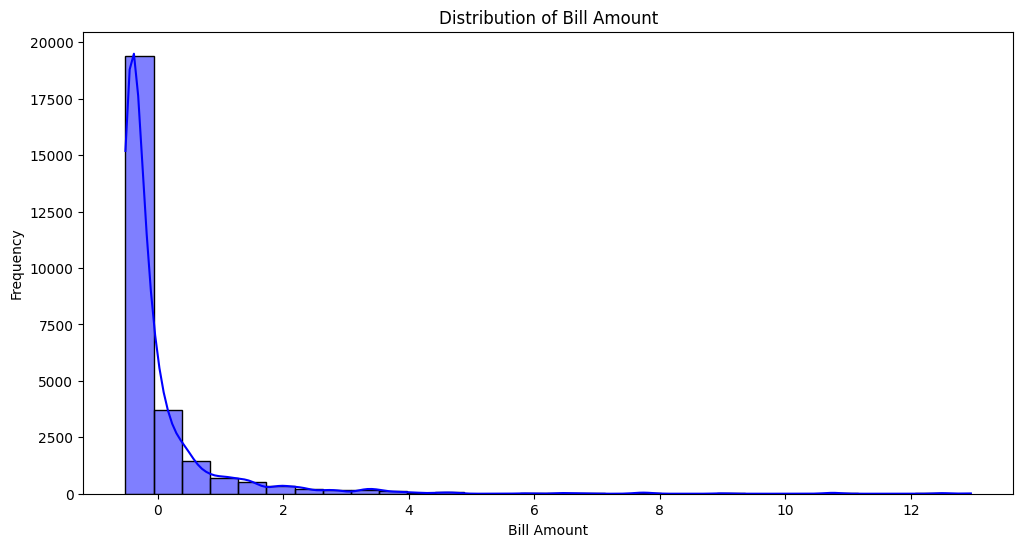

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of key variables
plt.figure(figsize=(12, 6))
sns.histplot(data=working_data_scaled['BILL_AMT'], bins=30, kde=True, color='blue')
plt.title('Distribution of Bill Amount')
plt.xlabel('Bill Amount')
plt.ylabel('Frequency')
plt.show()

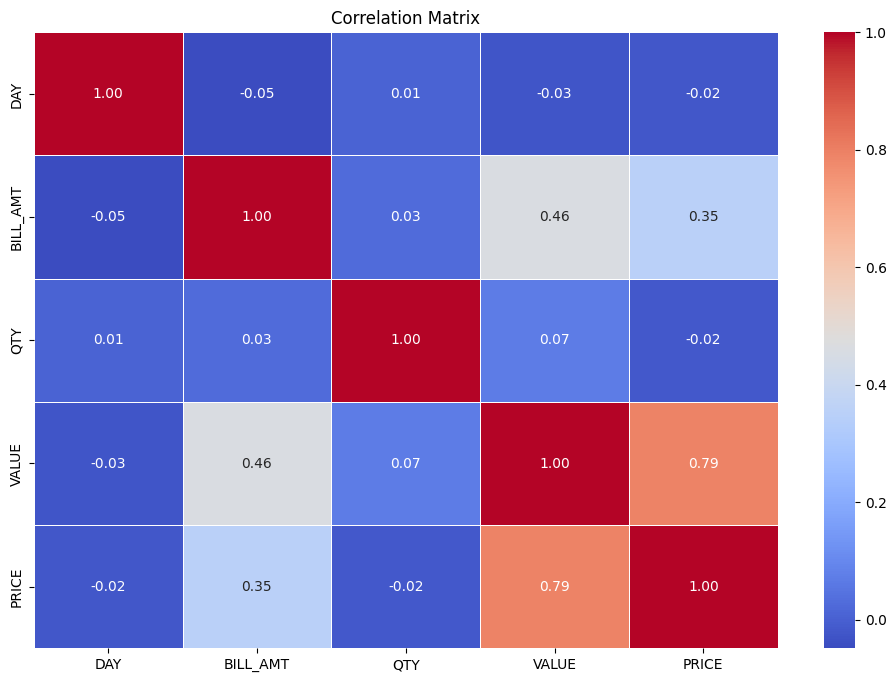

In [41]:
# Explore correlations between different variables
plt.figure(figsize=(12, 8))
correlation_matrix = working_data_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

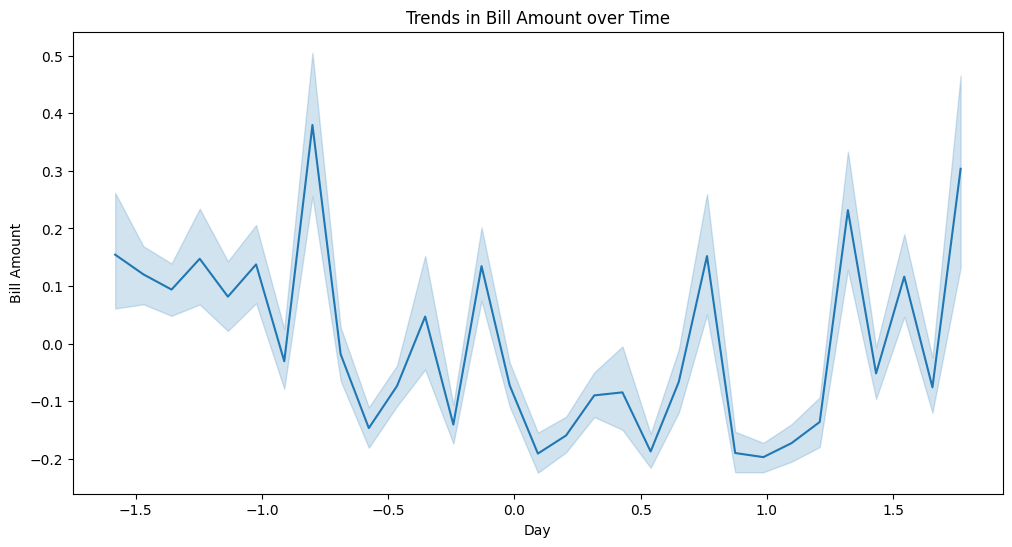

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=working_data_scaled, x='DAY', y='BILL_AMT')
plt.title('Trends in Bill Amount over Time')
plt.xlabel('Day')
plt.ylabel('Bill Amount')
plt.show()

<ipython-input-43-9b2032d07929>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ideal_data, y='GRP', order=ideal_data['GRP'].value_counts().index, palette='pastel')


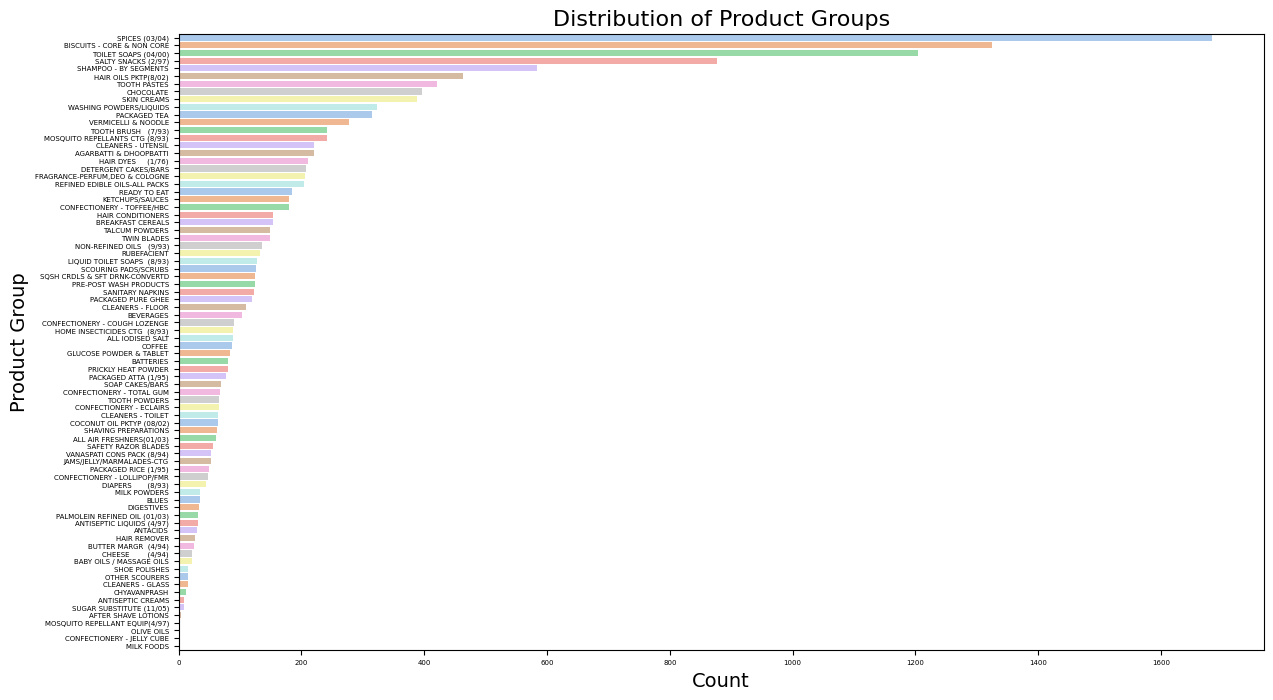

In [43]:
# Visualize the distribution of a categorical variable using a bar chart
plt.figure(figsize=(14, 8))  # Increase the size of the chart
sns.countplot(data=ideal_data, y='GRP', order=ideal_data['GRP'].value_counts().index, palette='pastel')
plt.title('Distribution of Product Groups', fontsize=16)  # Increase the title font size
plt.xlabel('Count', fontsize=14)  # Increase the x-axis label font size
plt.ylabel('Product Group', fontsize=14)  # Increase the y-axis label font size
plt.xticks(fontsize=5)  # Decrease the tick label font size
plt.yticks(fontsize=5)  # Decrease the tick label font size
plt.show()

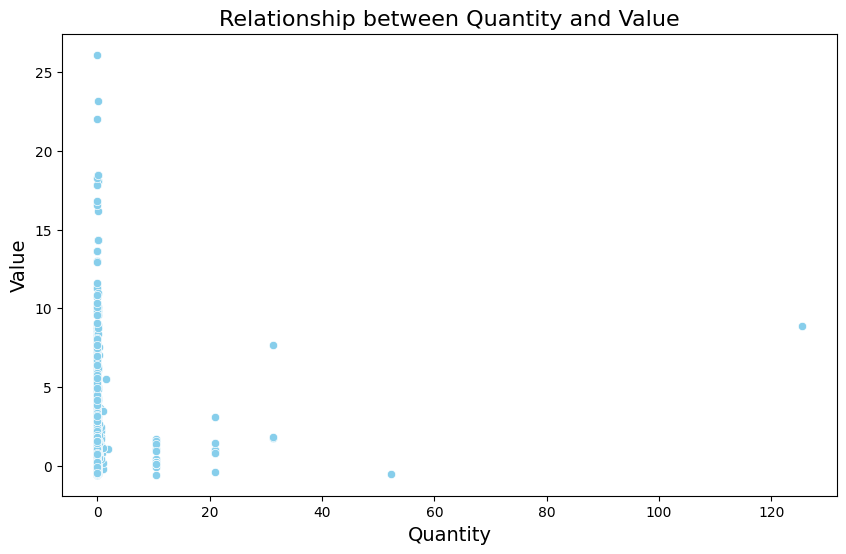

<ipython-input-44-9c33392cb2e7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ideal_data, x='MONTH', y='VALUE', palette='pastel')


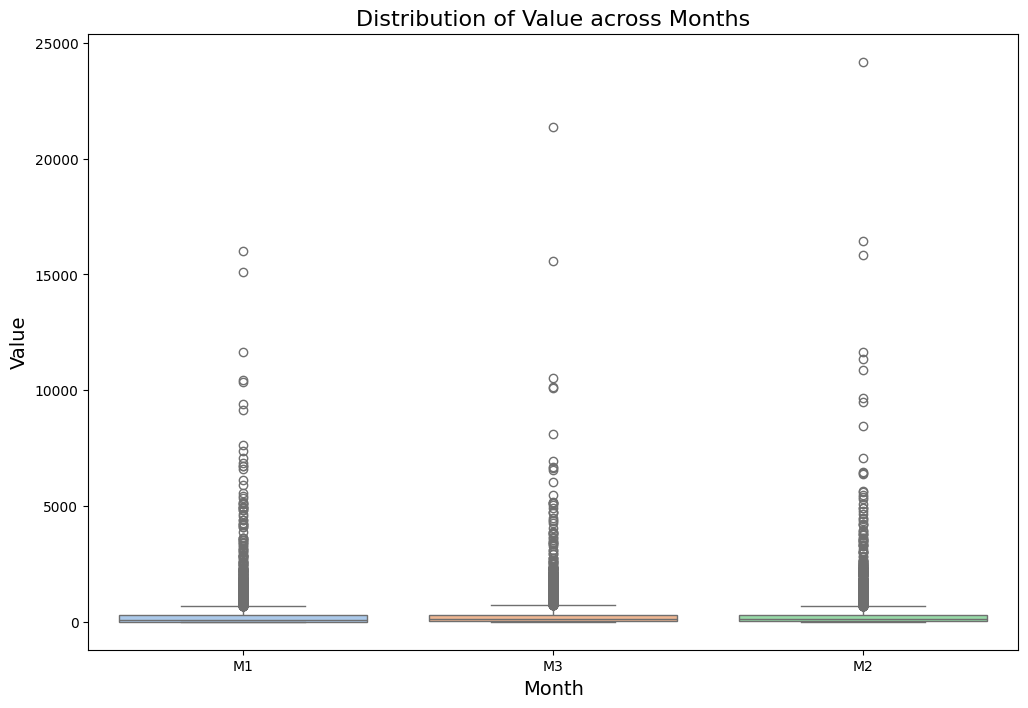

In [44]:
# Scatter plot to explore the relationship between two numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=working_data_scaled, x='QTY', y='VALUE', color='skyblue')
plt.title('Relationship between Quantity and Value', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.show()

# Box plot to visualize the distribution of a numerical variable across different categories
plt.figure(figsize=(12, 8))
sns.boxplot(data=ideal_data, x='MONTH', y='VALUE', palette='pastel')
plt.title('Distribution of Value across Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.show()

In [45]:
working_data_scaled.head()

,DAY,BILL_AMT,QTY,VALUE,PRICE
0,-1.246891,-0.099290,-0.032457,1.332088,2.026060
1,-1.246891,-0.339413,-0.032457,0.230429,0.496399
2,-1.246891,-0.496417,-0.032457,-0.489887,-0.503764
3,-1.246891,-0.315401,-0.032457,0.340595,0.649365
4,-1.246891,-0.479793,-0.032457,-0.413618,-0.397865


In [47]:
working_data_scaled.columns

Index(['DAY', 'BILL_AMT', 'QTY', 'VALUE', 'PRICE'], dtype='object')

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, Flatten

# Assuming you have loaded the scaled data into a DataFrame named 'working_data_scaled'

# Assuming the target variable is stored in the 'PRICE' column of your DataFrame
target_variable = working_data_scaled['PRICE']

# Splitting the data into features (X) and target variable (y)
X = working_data_scaled.drop(columns=['PRICE'])  # Exclude target variable from features
y = target_variable

# Reshape X for Conv1D input
X_cnn = X.values.reshape(X.shape[0], X.shape[1], 1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y, test_size=0.2, random_state=42)
# Define and compile the models
gru_model = Sequential([
    GRU(units=64, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])
gru_model.compile(optimizer='adam', loss='mse')

lstm_model = Sequential([
    LSTM(units=64, input_shape=(X_train.shape[1], 1)),
    Dense(units=1)
])
lstm_model.compile(optimizer='adam', loss='mse')

cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(units=1)
])
cnn_model.compile(optimizer='adam', loss='mse')
# Train the models
gru_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)
lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)
cnn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the models
gru_loss = gru_model.evaluate(X_test, y_test)
lstm_loss = lstm_model.evaluate(X_test, y_test)
cnn_loss = cnn_model.evaluate(X_test, y_test)

# Print the evaluation results
print("GRU Model Loss:", gru_loss)
print("LSTM Model Loss:", lstm_loss)
print("CNN Model Loss:", cnn_loss)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.6118 - val_loss: 0.2489
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.5201 - val_loss: 0.2407
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2777 - val_loss: 0.2353
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2874 - val_loss: 0.2329
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2456 - val_loss: 0.2344
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3322 - val_loss: 0.2275
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2518 - val_loss: 0.2245
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2419 - val_loss: 0.2219
Epoch 9/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2482 - val_loss: 0.2202
Epoch 10/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2850 - val_loss: 0.1996
Epoch 11/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.2288 - val_loss: 0.2039
Epoch 12/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


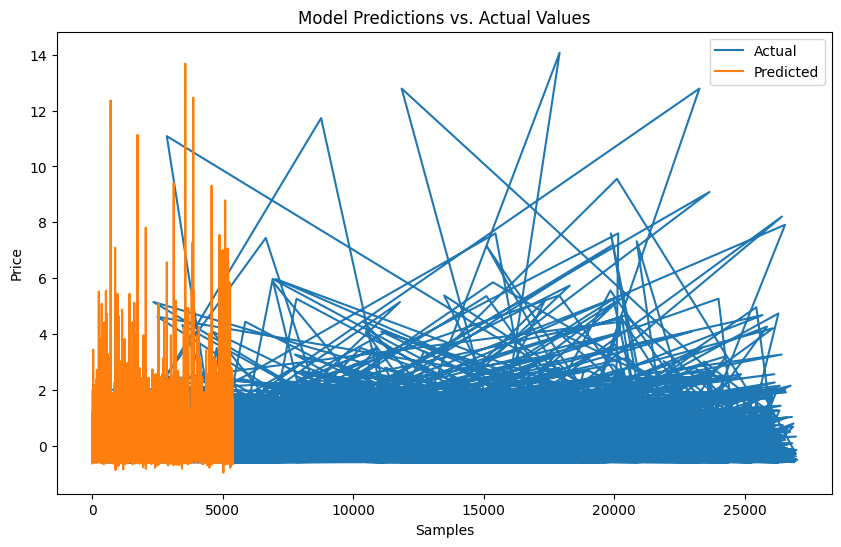

In [49]:
y_pred = gru_model.predict(X_test)
y_true = y_test

# Visualize Model Outputs

plt.figure(figsize=(10, 6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Model Predictions vs. Actual Values')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()
plt.show()

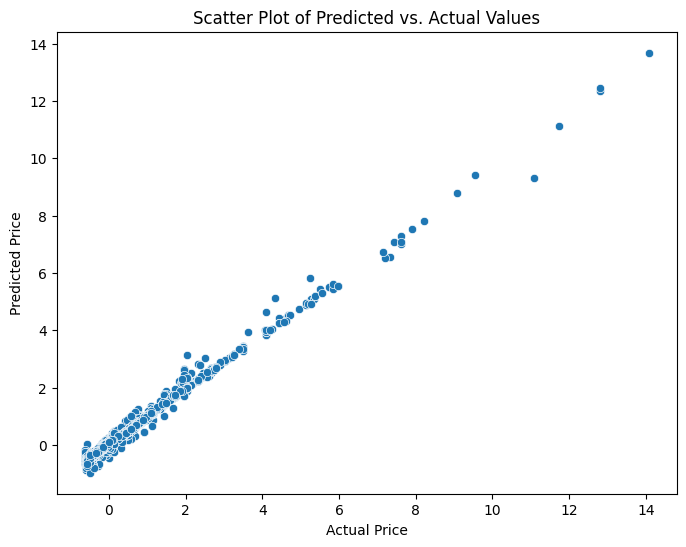

In [50]:
# Example: Scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_true.values.flatten(), y=y_pred.flatten())
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [51]:
#  Extract Actionable Insights
# Derive actionable insights from the model predictions
# Example: Calculate the mean absolute error (MAE) to evaluate model performance
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.059140392609653175


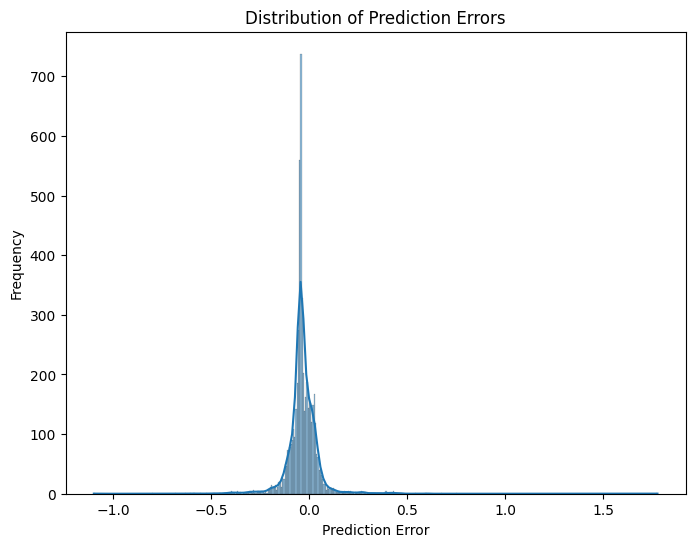

In [52]:
#  Identify Areas for Improvement
# Evaluate model performance and identify areas for improvement
# Example: Plot the distribution of prediction errors
errors = (y_true.squeeze() - y_pred.squeeze())
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

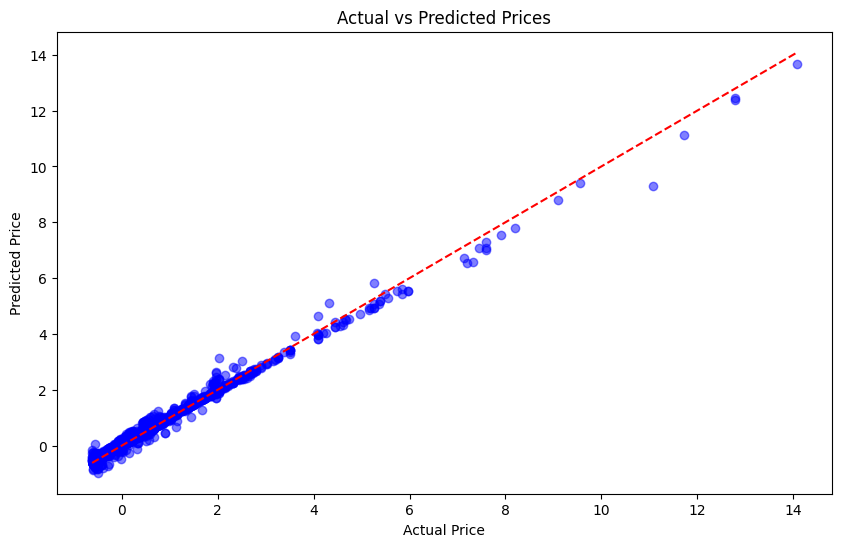

In [53]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')  # Plotting the diagonal line
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [54]:
working_data_scaled.head()

,DAY,BILL_AMT,QTY,VALUE,PRICE
0,-1.246891,-0.099290,-0.032457,1.332088,2.026060
1,-1.246891,-0.339413,-0.032457,0.230429,0.496399
2,-1.246891,-0.496417,-0.032457,-0.489887,-0.503764
3,-1.246891,-0.315401,-0.032457,0.340595,0.649365
4,-1.246891,-0.479793,-0.032457,-0.413618,-0.397865


Model input shape: (None, 4, 1)
Shape of X before prediction: (26985, 4, 1)
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Shape of y_true: (26985,)
Shape of y_pred: (26985,)
Root Mean Squared Error (RMSE): 0.1094049365840292


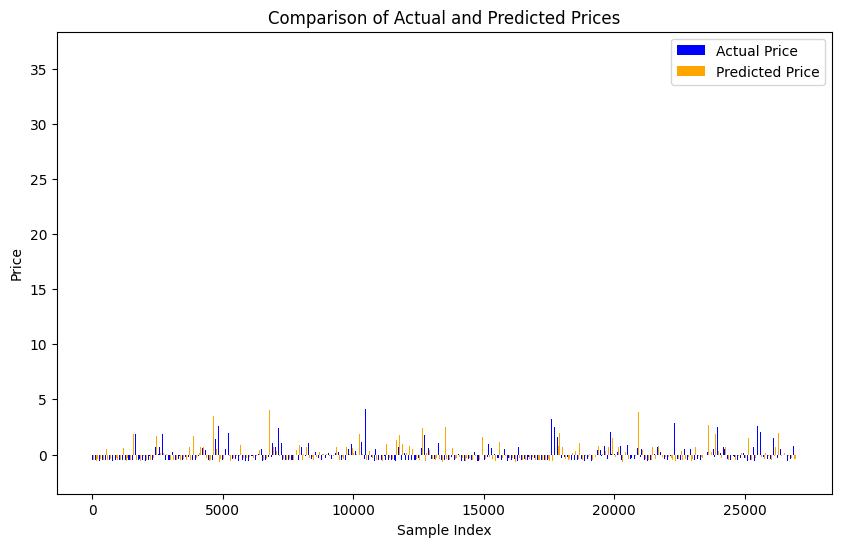

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# Assuming 'working_data_scaled' contains your scaled dataset
df = working_data_scaled

# Assume 'X' contains the features used for prediction
X = df.drop(columns=['PRICE'])  # Exclude the target variable
y_true = df['PRICE']  # Actual prices from the dataset

# Reshape X to match the expected input shape of the GRU model
# Model expects (samples, timesteps, features)
# Here, timesteps = 4 and features = 1
X = np.reshape(X.values, (X.shape[0], 4, 1))  # Assuming X has 4 features and reshaping to (samples, 4, 1)

# Ensure the model is loaded correctly (Replace 'gru_model' with your actual model)
model = gru_model  # Ensure that 'gru_model' is the trained GRU model you want to use

# Print the model's expected input shape
print(f"Model input shape: {model.input_shape}")

# Verify that X matches the expected input shape
print(f"Shape of X before prediction: {X.shape}")

# Use the model to make predictions
try:
    y_pred = model.predict(X)
    # Flatten y_pred to match the shape of y_true
    y_pred = y_pred.flatten()
except Exception as e:
    print(f"Error during prediction: {e}")
    raise

# Check the shapes of y_true and y_pred
print(f"Shape of y_true: {y_true.shape}")
print(f"Shape of y_pred: {y_pred.shape}")

# Ensure both y_true and y_pred are of the same shape before calculating RMSE
if y_true.shape != y_pred.shape:
    raise ValueError(f"Shape mismatch: y_true shape {y_true.shape} and y_pred shape {y_pred.shape}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Plotting the actual vs predicted prices
plt.figure(figsize=(10, 6))
bar_width = 0.35  # Define the bar width
plt.bar(np.arange(len(y_true)), y_true, width=bar_width, label='Actual Price', color='blue')
plt.bar(np.arange(len(y_pred)) + bar_width, y_pred, width=bar_width, label='Predicted Price', color='orange')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Comparison of Actual and Predicted Prices')
plt.legend()
plt.show()


In [68]:
import io
import pandas as pd

# Assuming uploads3 is a dictionary-like object with file content
validation_data_file = pd.read_csv(io.BytesIO(uploads3['Hackathon_Validation_Data.csv']))

# Directly use the DataFrame
validate_df = validation_data_file
validate_df.head()


,ID,STORECODE,MONTH,GRP
0,1112535,N1,M1,AFTER SHAVE LOTIONS
1,1112539,N1,M1,AGARBATTI & DHOOPBATTI
2,1112543,N1,M1,ALL AIR FRESHNERS(01/03)
3,1112547,N1,M1,ALL IODISED SALT
4,1112551,N1,M1,ANTACIDS


In [76]:
gru_model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,789 (151.52 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,860 (101.02 KB)

In [80]:
print("Shape of ID column:", validate_df['ID'].shape)

# Check the shape of y_pred
print("Shape of y_pred:", y_pred.shape)

Shape of ID column: (2430,)
Shape of y_pred: (26985,)


In [82]:
# Filter y_pred based on the length of validate_df['ID']
y_pred_filtered = y_pred[:len(validate_df['ID'])]

# Convert predictions to integers and ensure non-negativity
y_pred_int = np.round(y_pred_filtered).astype(int)
y_pred_int[y_pred_int < 0] = 0

# Create the DataFrame for submission
submission_df = pd.DataFrame({'ID': validate_df['ID'], 'TOTALVALUE': y_pred_int.flatten()})

In [83]:
submission_df.head()

,ID,TOTALVALUE
0,1112535,2
1,1112539,0
2,1112543,0
3,1112547,1
4,1112551,0


In [84]:
# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)
print("DONE!!")

DONE!!
